# **Edunet Foundation**

# Lab: Classification of Images Using Transfer Learning - Inception V3

In [19]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [20]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# **Uploading Data via Kaggle Api**


In [21]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
from zipfile import ZipFile
file_name = "/content/archive (3).zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
#Give dataset path
train_path = '/content/Data/train'
test_path = '/content/Data/test'

# **Designing Inception V3 Model**

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

InceptionV3_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step



#### **InceptionV3_model.layers:**

InceptionV3_model is a deep learning model based on the InceptionV3 architecture, which has been pre-trained on a large dataset like ImageNet.

layers is a list containing all the layers of the model. Each layer in the model represents a set of operations that transform the input data into features or predictions.

**[:-15]:**

* This Python slicing syntax selects all layers of the model except the last 15. The -15 index refers to the 15th layer from the end of the list, and [:-15] means "all layers up to but not including the 15th from the last."

* In simpler terms, it picks the first few layers and excludes the last 15 layers of the model.

**layer.trainable = False:**

* This line sets the trainable attribute of each selected layer to False.
When a layer’s trainable attribute is set to False, its weights are frozen during training, meaning they will not be updated when the model is trained on new data.

* Freezing these layers prevents them from being altered, allowing the model to retain the learned features from the original task (e.g., ImageNet classification).


**Fine-Tuning the Last 15 Layers:**

* The goal of this code is to fine-tune only the last 15 layers of the InceptionV3 model for the new task.
* By freezing all the layers except the last 15, the earlier layers (which capture general features like edges, textures, and shapes) are retained as they are, while only the later layers (which capture more specific and abstract features) are retrained on the new dataset.

**Why Fine-Tune the Last 15 Layers?:**
* The last layers of a deep learning model are typically responsible for higher-level feature extraction and classification.
* Fine-tuning these layers allows the model to adapt these features to the specific details of the new task, while leveraging the generalized features learned by the earlier layers.

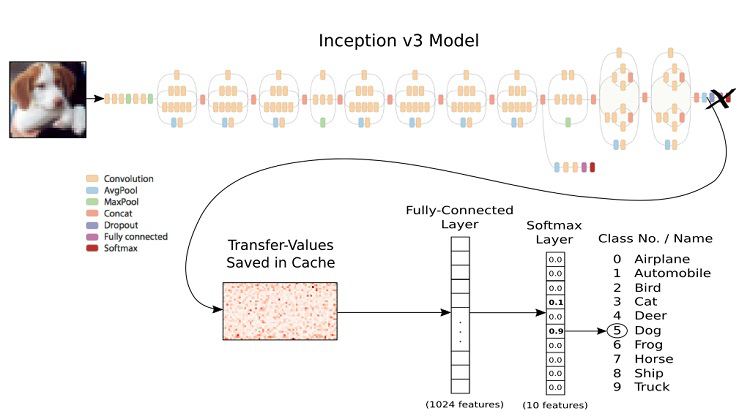

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
output  = Dense(units=4, activation='softmax')(x)
model = Model(InceptionV3_model.input, output)


model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 111, 111,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 111, 111,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 111, 111,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 109, 109,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 109, 109,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 109, 109,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 109, 109,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 54, 54,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 54, 54,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 54, 54,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 54, 54,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 52, 52,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 52, 52,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 52, 52,    │          0 │ batch_normalizat

 Total params: 23,116,580 (88.18 MB)

 Trainable params: 1,708,676 (6.52 MB)

 Non-trainable params: 21,407,904 (81.66 MB)

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

# **Image Augmentation**

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = False)

test_datagen = ImageDataGenerator(rescale = 1./255)
#no flip and zoom for test datase

#### 1️⃣ ImageDataGenerator — what it actually does

This class does two jobs:

- Preprocess images (scaling, normalization)

- Artificially expand your training data using transformations (augmentation)

🔹 rescale = 1./255

Converts pixel values from 0–255 → 0–1

Neural networks expect normalized inputs

Without this, training becomes unstable or slower

🔹 shear_range = 0.2

Applies a shearing transformation (tilting the image)

Simulates real-world variations in camera angle or object orientation

🔹zoom_range = 0.2

Randomly zooms in/out by up to ±20%

Prevents the model from overfitting to a fixed object size

🔹 horizontal_flip = True

Randomly flips images left ↔ right

⚠️ This is where people make mistakes

Good for: animals, faces, generic objects

Bad for: medical images (left/right anatomy matters), text, traffic signs

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/Data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 315 images belonging to 4 classes.


# **Training Inception V3 Model**

In [ ]:

batch_size = 32
# Adjust the steps per epoch if needed
steps_per_epoch = len(training_set)
validation_steps = len(test_set)

1️⃣ batch_size = 32 — not magic, just a trade-off

- This means:

The model does NOT see the entire dataset at once

It sees 32 images at a time, computes gradients, updates weights

- Why 32?

Small enough to fit in memory

Large enough to give stable gradient estimates

- There is nothing sacred about 32.

It’s a compromise between:

Memory usage

Training stability

Speed

- len(training_set)

number of batches per epoch, not number of images

- What `steps_per_epoch` means

How many batches the model processes before calling it “one epoch”

So:

1 step = 1 batch

1 epoch = steps_per_epoch `×` batch_size images



In [ ]:
# Fit the model with adjusted steps and repeat
r = model.fit(
    training_set,
    validation_data=test_set,
    epochs=8,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    #workers=4,  # Use workers if necessary for multi-threaded processing
    #use_multiprocessing=True  # Use multiprocessing if beneficial
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 60s 2s/step - accuracy: 0.3840 - loss: 1.4052 - val_accuracy: 0.6413 - val_loss: 0.7998
Epoch 2/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 13s 631ms/step - accuracy: 0.6345 - loss: 0.8674 - val_accuracy: 0.5429 - val_loss: 1.3970
Epoch 3/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 629ms/step - accuracy: 0.6214 - loss: 0.9817 - val_accuracy: 0.7143 - val_loss: 0.6513
Epoch 4/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 621ms/step - accuracy: 0.7458 - loss: 0.6224 - val_accuracy: 0.7206 - val_loss: 0.7825
Epoch 5/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 621ms/step - accuracy: 0.7860 - loss: 0.5310 - val_accuracy: 0.7175 - val_loss: 0.7341
Epoch 6/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 605ms/step - accuracy: 0.8215 - loss: 0.4453 - val_accuracy: 0.7238 - val_loss: 0.8715
Epoch 7/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 11s 567ms/step - accuracy: 0.8130 - loss: 0.3999 - val_accuracy: 0.6667 - val_loss: 0.9406
Epoch 8/8
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 585ms/step - accuracy: 0.8536 - loss: 0.3554 - val_accuracy: 0.815

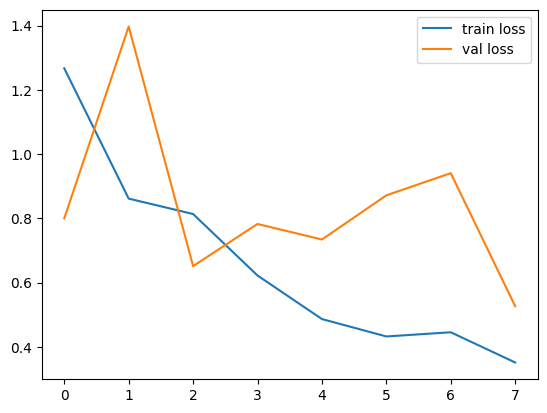

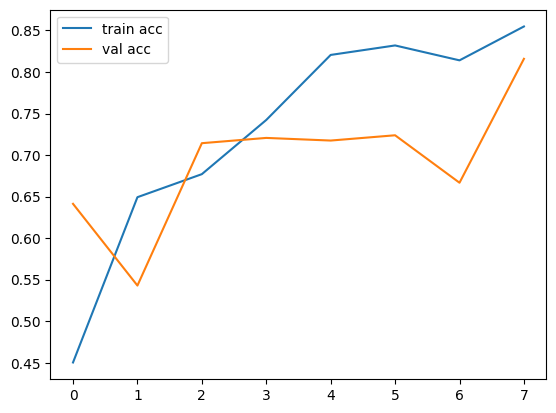

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('modelcancerlung.h5')

# **Making Predictions**

In [ ]:
classes = ["AdenocarcinomaChest Lung Cancer ","Large cell carcinoma Lung Cancer" , "NO Lung Cancer/ NORMAL" , "Squamous cell carcinoma Lung Cancer"]

In [ ]:
def predict_image(img):
    plt.figure(figsize=(40,8))
    print()
    print('-----------------------------------Chest Cancer Type Detection---------------------------------------------------')
    print()
    print('----------------------------------------------RESULT-------------------------------------------------------------')
    print()
    x=image.img_to_array(img)
    x=x/255
    plt.imshow(img)
    x=np.expand_dims(x,axis=0)
    #img_data=preprocess_input(x)

    print(classes[np.argmax(model.predict(x))])


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
AdenocarcinomaChest Lung Cancer 


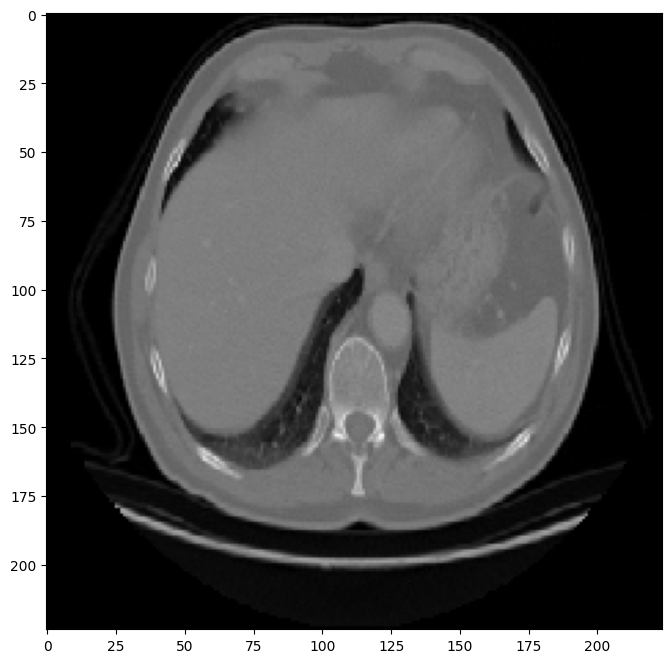

In [ ]:
from tensorflow.keras.preprocessing import image
im=image.load_img('/content/Data/test/adenocarcinoma/000121 (6).png',target_size=(224,224))
predict_image(im)


-----------------------------------Chest Cancer Type Detection---------------------------------------------------

----------------------------------------------RESULT-------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Squamous cell carcinoma Lung Cancer


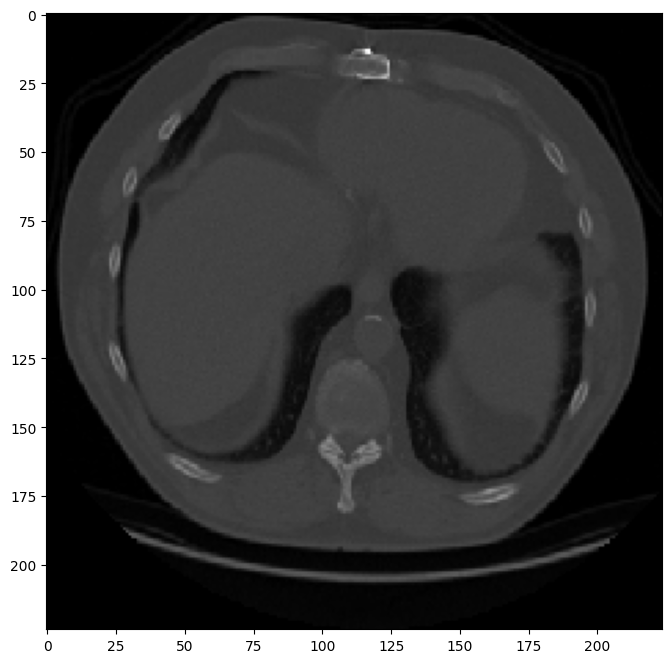

In [ ]:
im4=image.load_img('/content/Data/test/squamous.cell.carcinoma/000118 (3).png',target_size=(224,224))
predict_image(im4)

# **Happy Learning**